In [24]:
import sys
import os
import pandas as pd
import numpy as np
import pymc

sys.path.append(f'{os.path.dirname(os.path.dirname(os.getcwd()))}/draft_pick_prob')

In [34]:
#draft_df=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2021_validation/2021_draft_order.csv')
draft_df = pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2019_validation/2019_draft_order.csv')


mock_draft_df=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2019_validation/2019_BM_mockdraft.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_BM'})
mock_draft_df_2=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2019_validation/2019_CP_mockdraft.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_CP'})
mock_draft_df_3=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2019_validation/2019_2CP_mockdraft.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_CP2'})
mock_draft_df_4=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2019_validation/2019_3CP_mockdraft.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_CP3'})
mock_draft_df_5=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2019_validation/2019_WW_mockdraft.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_W'})


mock_draft_df_6=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2019_validation/2019_SK_bb.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_SK'})
mock_draft_df_7=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2019_validation/2019_HS_bb.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_HS'})
mock_draft_df_8=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2019_validation/2019_2SK_bb.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_2S'})


possible_players=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2019_validation/2019_PLAYER_IDS.csv')

In [35]:
#draft_df=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2021_validation/2021_draft_order.csv',encoding='ISO-8859-1')

file_list =['2019_BM_mockdraft.csv','2019_CP_mockdraft.csv','2019_2CP_mockdraft.csv','2019_3CP_mockdraft.csv','2019_WW_mockdraft.csv','2019_SK_bb.csv','2019_HS_bb.csv','2019_2SK_bb.csv']

mock_draft_dfs = []


for filename in file_list:
    df = pd.read_csv(filename)  # Read the CSV file
    
    # Sort the DataFrame by 'RANK' column
    df = df.sort_values(by='RANK')
    
    prefix = filename[5:7]
        
    # Rename the 'RANK' column based on the extracted prefix
    if filename[-6:-4]== 'bb':
        df = df.rename(columns={'RANK': f'bb_RANK_{prefix}'})
    else:
        df = df.rename(columns={'RANK': f'md_RANK_{prefix}'})
    
    mock_draft_dfs.append(df)  # Add the processed DataFrame to the list



#possible_players=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2021_validation/2021_PLAYER_IDS.csv')
#draft_df
#possible_players

mock_draft_dfs[4]

,PLAYER_NAME,PLAYER_ID,md_RANK_WW
0,Jack Hughes,1,1
1,Kaapo Kakko,2,2
2,Alex Turcotte,5,3
3,Dylan Cozens,7,4
4,Bowen Byram,4,5
5,Trevor Zegras,9,6
6,Cole Caufield,15,7
7,Kirby Dach,3,8
8,Peyton Krebs,17,9
9,Matthew Boldy,12,10


In [65]:
import math
df_player_rankings=possible_players[['PLAYER_ID']].merge(mock_draft_dfs[0][['PLAYER_ID','md_RANK_BM']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[1][['PLAYER_ID','md_RANK_CP']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[2][['PLAYER_ID','md_RANK_2C']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[3][['PLAYER_ID','md_RANK_3C']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[4][['PLAYER_ID','md_RANK_WW']], how='left', on=['PLAYER_ID'])

df_player_rankings=df_player_rankings.merge(mock_draft_dfs[5][['PLAYER_ID','bb_RANK_SK']], how='left', on=['PLAYER_ID'])
#df_player_rankings=df_player_rankings.merge(mock_draft_dfs[6][['PLAYER_ID','bb_RANK_HS']], how='left', on=['PLAYER_ID'])
#df_player_rankings=df_player_rankings.merge(mock_draft_dfs[7][['PLAYER_ID','bb_RANK_2S']], how='left', on=['PLAYER_ID'])


df_player_rankings

,PLAYER_ID,md_RANK_BM,md_RANK_CP,md_RANK_2C,md_RANK_3C,md_RANK_WW,bb_RANK_SK
0,1,1.0,1.0,1.0,1.0,1.0,1.0
1,2,2.0,2.0,2.0,2.0,2.0,2.0
2,3,5.0,5.0,8.0,5.0,8.0,12.0
3,4,3.0,4.0,5.0,3.0,5.0,4.0
4,5,4.0,3.0,3.0,4.0,3.0,7.0
...,...,...,...,...,...,...,...
224,222,NaN,NaN,89.0,NaN,NaN,55.0
225,223,NaN,NaN,NaN,NaN,NaN,19.0
226,224,NaN,NaN,NaN,NaN,NaN,37.0
227,225,NaN,NaN,NaN,NaN,NaN,41.0


In [72]:
def likelihood(strengths, rankings):
    # params: vector of parameters [intercept, slope]
    likelihood=1
    counter=1
    paired_lists = list(zip(strengths, rankings))
    sorted_pairs = sorted(paired_lists, key=lambda x: x[1])
    sorted_list1, sorted_list2 = zip(*sorted_pairs)
    while counter<len(sorted_list2)+1 and sorted_list2[counter]!=sorted_list2[counter+1]:
        # print(np.exp(sorted_list1[counter-1]))
        # print(np.sum(np.exp(sorted_list1[counter-1:])))
        # print(np.exp(sorted_list1[counter-1])/np.sum(np.exp(sorted_list1[counter-1:])))
        likelihood+=np.log(np.exp(sorted_list1[counter-1])/np.sum(np.exp(sorted_list1[counter-1:])))
        counter+=1
    return likelihood

def neg_log_likelihood(params, df):
    neg_ll = 1  # Initialize as 0 for correct accumulation
    columns_to_go_through = df.columns[1:]
    for i in columns_to_go_through:
        max_rank = df[i].max() + 1
        player_rank = list(df[i])
        fixed_player_rank = [max_rank if math.isnan(x) else x for x in player_rank]
        
        # Determine the weighting factor based on column name
        if i.startswith('bb'):
            weight = 1  # Example: 0.5 for less value
        elif i.startswith('md'):
            weight = 1.0  # Example: 1.0 (or more) for 'md' columns
        else:
            weight = 1.0  # Default weight for other columns

        # Apply the weighting factor
        neg_ll -= weight * likelihood(params, fixed_player_rank)

    return neg_ll

In [67]:
def constraint_eq(x):
    return sum(x)

In [73]:
import scipy.optimize

counter=40
l_play=[]
variable_bounds=[]
count=0

while count<len(df_player_rankings):
    l_play.append(counter)
    count+=1
    counter-=0.20
    variable_bounds.append((-40,40))

result = scipy.optimize.minimize(neg_log_likelihood, l_play, args=(df_player_rankings,), method='SLSQP', bounds=variable_bounds, constraints={'type': 'eq', 'fun': constraint_eq})
print(result.x)

[ 4.00000000e+01  3.29021295e+01  2.26277223e+01  2.47980468e+01
  2.48094585e+01  1.84254413e+01  2.32383724e+01  1.88023725e+01
  2.24490839e+01  2.03079750e+01  1.87318922e+01  2.14445968e+01
  1.86478758e+01  1.70579634e+01  2.19163143e+01  1.92861954e+01
  2.19407237e+01  1.77162749e+01  1.55059476e+01  1.74653056e+01
  1.58556150e+01  1.67684336e+01  5.68349864e+00  1.74653672e+01
  1.60354481e+01  1.67822832e+01  1.45259850e+01  1.83593585e+01
  1.52933999e+01  1.47500851e+01  1.59056976e+01  5.04803618e+00
  1.86666079e+01  1.72702253e+01  5.04557476e+00  5.04614967e+00
  5.04726421e+00  1.81717393e+01  5.04810168e+00  1.68906888e+01
  1.44516250e+01  5.04721342e+00  1.47860595e+01  1.47168440e+01
  1.45631431e+01  1.44516235e+01  5.04751138e+00  5.04379901e+00
  1.65475356e+01  5.00851166e+00  4.96702363e+00  1.44888113e+01
  4.80994321e+00  1.48088636e+01  4.52369293e+00  1.46636312e+01
  4.10302408e+00  3.85485709e+00  3.59333503e+00  3.33475474e+00
  3.09203157e+00  2.88548

In [74]:
player_ability_parameters_df=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2019_validation/2019_PLAYER_IDS.csv')
player_ability_parameters_df['ABILITY_PARAMS']=result.x

player_ability_parameters_df=player_ability_parameters_df.sort_values(by='ABILITY_PARAMS', ascending=False, axis=0)
player_ability_parameters_df['SIM_RANK'] = range(1, len(player_ability_parameters_df) + 1)
player_ability_parameters_df.head(10)

,PLAYER_NAME,PLAYER_ID,ABILITY_PARAMS,SIM_RANK
0,Jack Hughes,1,40.000000,1
1,Kaapo Kakko,2,32.902130,2
4,Alex Turcotte,5,24.809458,3
3,Bowen Byram,4,24.798047,4
6,Dylan Cozens,7,23.238372,5
2,Kirby Dach,3,22.627722,6
8,Trevor Zegras,9,22.449084,7
16,Peyton Krebs,17,21.940724,8
14,Cole Caufield,15,21.916314,9
11,Matthew Boldy,12,21.444597,10


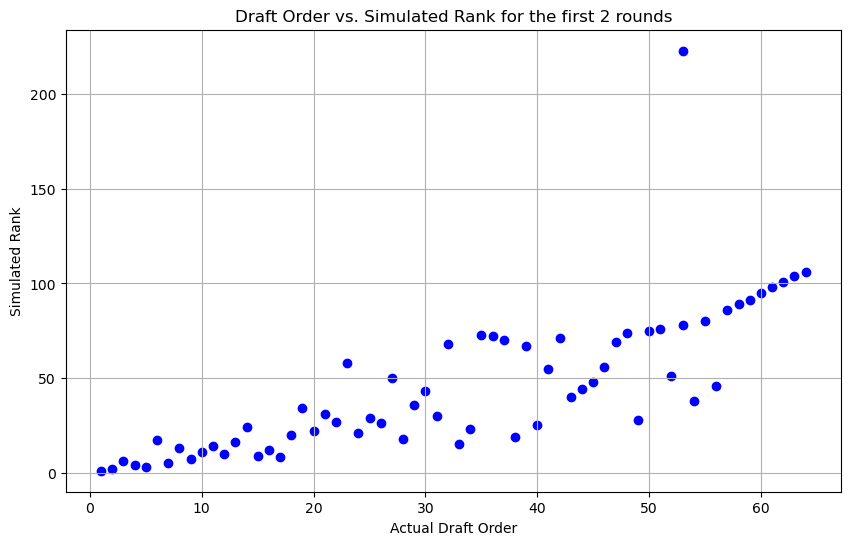

In [75]:
import matplotlib.pyplot as plt

# Assuming you have DataFrames: draft_df and player_ability_parameters_df

# Merge the two DataFrames on the 'PLAYER_NAME' column
merged_df = player_ability_parameters_df.merge(draft_df[['PLAYER_ID', 'ORDER']], on='PLAYER_ID')
merged_df = merged_df.sort_values(by='ORDER')
merged_df
# Filter the data for the first 100 orders
merged_df_first_100 = merged_df.head(65)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df_first_100['ORDER'], merged_df_first_100['SIM_RANK'], c='blue', label='Draft Order vs. Simulated Rank')
plt.xlabel('Actual Draft Order')
plt.ylabel('Simulated Rank')
plt.title('Draft Order vs. Simulated Rank for the first 2 rounds')
plt.grid(True)


plt.show()




In [76]:
#Error -Mean absolute error (MAE)
merged_df = player_ability_parameters_df.merge(draft_df[['PLAYER_NAME', 'ORDER']], on='PLAYER_NAME')
merged_df = merged_df.sort_values(by='ORDER')
merged_df = merged_df.head(32)
merged_df['ERROR'] = abs(merged_df['SIM_RANK']-merged_df['ORDER'])
mae = merged_df['ERROR'].sum()/len(merged_df['ERROR'])
print(mae)


#1.0 gives 8.4
#0.8 gives 7.72
#0.5 gives 7.97
#0.2 give 8.5 





7.65625
